* 1. 데이터 불러오기 & 전처리

In [3]:
import pandas as pd

df = pd.read_csv("c:/vscode/미니프로젝트/2_분류_프로젝트/data/total_train.csv")
df.head(5)

,acc_id,survive,amount_spent,sell_cnt,buy_cnt,playtime,npc_kill,solo_exp,party_exp,quest_exp,...,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt_y,random_defender_cnt_y,same_pledge_cnt_y,temp_cnt_y,etc_cnt_y,combat_play_time,non_combat_play_time
0,2,1,0.000000,35.0,1.0,91.533663,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0,0.000000,0.0,10.0,6.116132,3.236452,2.155434,0.695285,0.111055,...,5.557755,1.587930,0.000000,1.936569,0.929907,0.000000,2.570959,0.814001,5.097608,0.004402
2,8,1,1.404644,7.0,10.0,18.797802,31.172609,31.489136,0.000000,1.561055,...,201.306223,58.031626,2.717332,33.631748,21.745527,29.441536,92.455650,61.354404,136.879854,0.033823
3,17,1,0.000000,33.0,57.0,28.464708,30.456852,9.255848,8.823094,2.322365,...,71.312495,21.689681,0.486279,9.230979,10.872764,1.591434,36.784494,12.514373,65.693573,0.000000
4,20,1,0.896531,9.0,45.0,25.588043,34.100184,0.274902,0.080060,0.083483,...,54.891855,25.515149,7.964404,11.974452,6.580883,11.140041,28.379435,44.409036,66.451919,0.000000


In [4]:
train_cols = df.columns[2:36]
X = df[train_cols]
y = df['survive']

In [5]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['survive'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['survive'].value_counts()

0    18004
1    18004
Name: survive, dtype: int64

In [6]:
X=df_samp[train_cols]
y=df_samp["survive"]

In [7]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)

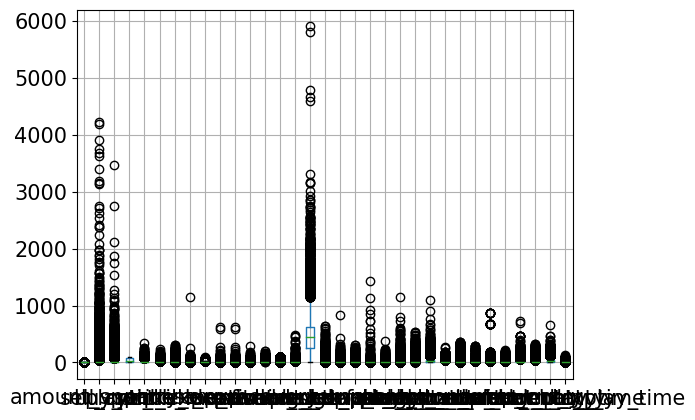

In [43]:
X_train.boxplot()
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0, max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7771991946122335
0.72590946959178


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      3601
           1       0.72      0.73      0.73      3601

    accuracy                           0.73      7202
   macro avg       0.73      0.73      0.73      7202
weighted avg       0.73      0.73      0.73      7202



In [51]:
from sklearn.model_selection import GridSearchCV

params = {
    'hidden_layer_sizes' : [(10,), (50,),
                            (10,10), (50,50)],
    'activation' : ['tanh','relu'],
    'alpha' : [0.0001, 0.01],
}

model = MLPClassifier(random_state=0, max_iter=1000)
clf = GridSearchCV(model, param_grid=params, cv=3)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_estimator_)

0.7215619163586595
MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50,),
              max_iter=1000, random_state=0)


In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def batch(X1, y1, n):
    x_size=len(X1)
    for idx in range(0, x_size, n):
        yield X1[idx:min(idx + n, x_size)], y1[idx:min(idx + n, x_size)]

clf2 = MLPClassifier(random_state=0)
points_tr=[]
points_te=[]
samp = batch(X_train, y_train, 10)
for idx, (chunk_X, chunk_y) in enumerate(samp):
    print(idx)
    clf2.partial_fit(chunk_X, chunk_y, classes=[0, 1, 2])
    pred = clf2.predict(X_train)
    point=accuracy_score(y_train, pred)
    points_tr.append(point)
    print('학습용:',point)
    pred = clf2.predict(X_test)
    point=accuracy_score(y_test, pred)
    points_te.append(point)
    print('검증용:',point)

0
학습용: 0.45615496771505937
검증용: 0.45584559844487643
1
학습용: 0.45948760674859407
검증용: 0.45876145515134686
2
학습용: 0.4633062556411859
검증용: 0.46362121632879755
3
학습용: 0.4677150593626328
검증용: 0.4688975284643155
4
학습용: 0.47320002777199194
검증용: 0.4750069425159678
5
학습용: 0.47823370131222664
검증용: 0.48014440433212996
6
학습용: 0.48476011941956537
검증용: 0.48514301582893643
7
학습용: 0.4904186627785878
검증용: 0.49097472924187724
8
학습용: 0.49708394084565716
검증용: 0.49777839489030823
9
학습용: 0.502499479275151
검증용: 0.5040266592613163
10
학습용: 0.5090953273623551
검증용: 0.5091641210774784
11
학습용: 0.5152745955703673
검증용: 0.515690086087198
12
학습용: 0.5201346941609387
검증용: 0.5202721466259372
13
학습용: 0.5254808026105673
검증용: 0.5254096084420994
14
학습용: 0.5299590363118795
검증용: 0.52929741738406
15
학습용: 0.5347497049225856
검증용: 0.533462926964732
16
학습용: 0.5386377837950427
검증용: 0.5365176339905582
17
학습용: 0.5425605776574325
검증용: 0.5413773951680089
18
학습용: 0.54540720683191
검증용: 0.544987503471258
19
학습용: 0.5493994306741651
검증용: 0.54

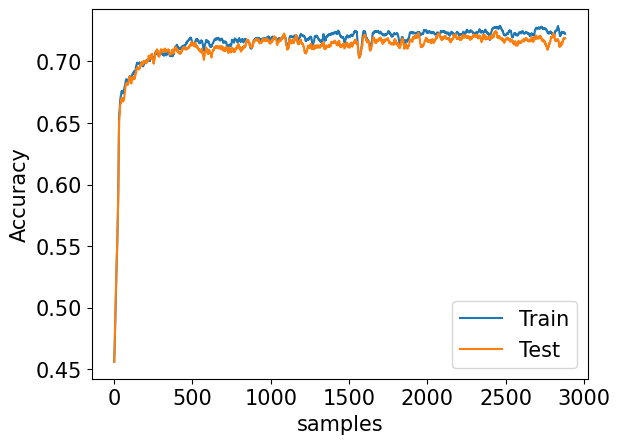

In [35]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"]=15
plt.plot(points_tr, label="Train")
plt.plot(points_te, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("samples")
plt.legend()

c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


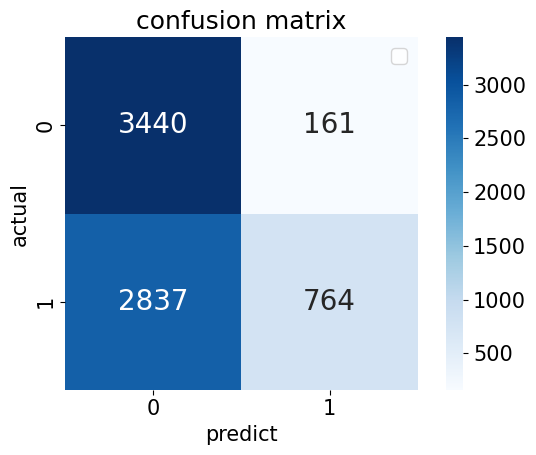

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = clf.predict(X_test)
matrix = confusion_matrix(y_test, pred_y)

sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='Blues', fmt='g',
            square=True, annot_kws={'size':20})
plt.title('confusion matrix')
plt.ylabel('actual')
plt.xlabel('predict')
plt.legend()
plt.tight_layout()
plt.show()